<center>
<img src="../../img/ods_stickers.jpg">
## Открытый курс по машинному обучению
Авторы материала: программист-исследователь Mail.ru Group, старший преподаватель Факультета Компьютерных Наук ВШЭ Юрий Кашницкий и Data Scientist в Segmento Екатерина Демидова. Материал распространяется на условиях лицензии [Creative Commons CC BY-NC-SA 4.0](https://creativecommons.org/licenses/by-nc-sa/4.0/). Можно использовать в любых целях (редактировать, поправлять и брать за основу), кроме коммерческих, но с обязательным упоминанием автора материала.

# <center>Тема 1. Первичный анализ данных с Pandas</center>
## <center>Часть 0. Работа с векторами в библиотеке NumPy

**Numpy** - это библиотека Python для вычислительно эффективных операций с многомерными массивами, предназначенная в основном для научных вычислений.

In [48]:
# Python 2 and 3 compatibility
from __future__ import (absolute_import, division,
                        print_function, unicode_literals)
# отключим предупреждения Anaconda
import warnings
warnings.simplefilter('ignore')
import numpy as np

In [49]:
a = np.array([0, 1, 2, 3])
a

array([0, 1, 2, 3])

Такой массив может содержать:
- значения физических величин в разые моменты времени при моделировании
- значения сигнала, измеренного прибором
- интенсивности пикселов 
- 3D координаты объектов, полученных, например, при МРТ
- ...


**Зачем NumPy:** Эффективность базовых операций 


In [50]:
L = range(1000)

In [51]:
%timeit [i**2 for i in L]

308 µs ± 12.9 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [52]:
a = np.arange(1000)

In [53]:
%timeit a**2

1.51 µs ± 21.5 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


Интерактивная справка


In [54]:
?np.array

поиск в документации


In [55]:
np.lookfor('create array') 

Search results for 'create array'
---------------------------------
numpy.array
    Create an array.
numpy.memmap
    Create a memory-map to an array stored in a *binary* file on disk.
numpy.diagflat
    Create a two-dimensional array with the flattened input as a diagonal.
numpy.fromiter
    Create a new 1-dimensional array from an iterable object.
numpy.partition
    Return a partitioned copy of an array.
numpy.ctypeslib.as_array
    Create a numpy array from a ctypes array or a ctypes POINTER.
numpy.ma.diagflat
    Create a two-dimensional array with the flattened input as a diagonal.
numpy.ma.make_mask
    Create a boolean mask from an array.
numpy.ctypeslib.as_ctypes
    Create and return a ctypes object from a numpy array.  Actually
numpy.ma.mrecords.fromarrays
    Creates a mrecarray from a (flat) list of masked arrays.
numpy.ma.mvoid.__new__
    Create a new masked array from scratch.
numpy.lib.format.open_memmap
    Open a .npy file as a memory-mapped array.
numpy.ma.MaskedArr

In [56]:
np.con*?

#### Библиотеку принято импортировать так

In [57]:
import numpy as np

## Создание массивов

* **1-D**:


In [58]:
a = np.array([0, 1, 2, 3])
a

array([0, 1, 2, 3])

In [59]:
a.ndim

1

In [60]:
a.shape

(4,)

In [61]:
len(a)

4

* **2-D, 3-D, ...**:


In [62]:
b = np.array([[0, 1, 2], [3, 4, 5]])    # 2 x 3 array
b

array([[0, 1, 2],
       [3, 4, 5]])

In [63]:
b.ndim

2

In [64]:
b.shape

(2, 3)

In [65]:
len(b)     # returns the size of the first dimension

2

In [66]:
c = np.array([[[1], [2]], [[3], [4]]])
c

array([[[1],
        [2]],

       [[3],
        [4]]])

In [67]:
c.shape

(2, 2, 1)

## Методы для создания массивов

На практике мы редко добавляем элементы по одному


- Равномерно распределенные элементы:


In [68]:
b = np.arange(1, 300, 20) # start, end (exclusive), step
b

array([  1,  21,  41,  61,  81, 101, 121, 141, 161, 181, 201, 221, 241,
       261, 281])

In [69]:
a = np.arange(10) # 0 .. n-1  (!)
a

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

- по числу элементов:


In [70]:
c = np.linspace(0, 1, 6)   # start, end, num-points
c

array([0. , 0.2, 0.4, 0.6, 0.8, 1. ])

In [71]:
d = np.linspace(0, 1, 5, endpoint=False)
d

array([0. , 0.2, 0.4, 0.6, 0.8])

- Часто встречающиеся массивы:


In [72]:
a = np.ones((3, 3))  # reminder: (3, 3) is a tuple
a

array([[1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.]])

In [73]:
b = np.zeros((2, 2))
b

array([[0., 0.],
       [0., 0.]])

In [74]:
c = np.eye(3)
c

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [75]:
d = np.diag(np.array([1, 2, 3, 4]))
d

array([[1, 0, 0, 0],
       [0, 2, 0, 0],
       [0, 0, 3, 0],
       [0, 0, 0, 4]])

* `np.random` генерация случайных чисел (Mersenne Twister PRNG):

In [76]:
a = np.random.rand(4)       # uniform in [0, 1]
a  

array([0.19151945, 0.62210877, 0.43772774, 0.78535858])

In [77]:
b = np.random.randn(4)      # Gaussian
b  

array([-0.72058873,  0.88716294,  0.85958841, -0.6365235 ])

In [78]:
np.random.seed(1234)        # Setting the random seed

## Основные типы данных NumPy

Точка после числа означает, что это тип данных `float64`


In [79]:
a = np.array([1, 2, 3])
a.dtype

dtype('int64')

In [80]:
b = np.array([1., 2., 3.])
b.dtype

dtype('float64')

Можно задать тип данных явно. По умолчанию - `float64`

In [81]:
c = np.array([1, 2, 3], dtype=float)
c.dtype

dtype('float64')

In [82]:
a = np.ones((3, 3))
a.dtype

dtype('float64')

Прочие типы данных:

- Комплексные числа


In [83]:
d = np.array([1+2j, 3+4j, 5+6*1j])
d.dtype

dtype('complex128')

 - Bool


In [84]:
e = np.array([True, False, False, True])
e.dtype

dtype('bool')

- Строки

На строки память выделяется "жадно" - по максимальному числу литер в строке. 
В этом примере на каждую строку выделяется по 7 литер, и тип данных - 'S7'

In [85]:
f = np.array(['Bonjour', 'Hello', 'Hallo',])
f.dtype     # <--- strings containing max. 7 letters

dtype('<U7')

## Основы визуализации

$ ipython notebook --pylab=inline

Или из тетрадки:

In [86]:
#%pylab inline

Параметр `inline` говорит серверу IPython о том, что результаты будут отображаться в самой тетрадке, а не в новом окне. 


Импортируем *Matplotlib*


In [90]:
import matplotlib.pyplot as plt  # the tidy way

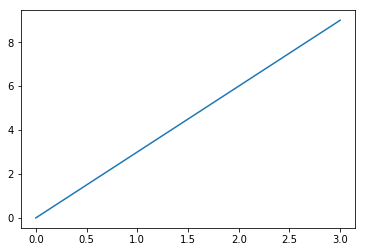

In [95]:
x = np.linspace(0, 3, 20)
y = np.linspace(0, 9, 20)
plt.plot(x, y)       # line plot    
plt.show()           # <-- shows the plot (not needed with pylab) 

Или с использованием *pylab*:


In [96]:
plot(x, y)       # line plot    

NameError: name 'plot' is not defined

Использование `import matplotlib.pyplot as plt` рекомендуется для скриптов, а `pylab` - в тетрадках IPython.

 - Отображение одномерных массивов:


In [ ]:
x = np.linspace(0, 3, 20)
y = np.linspace(0, 9, 20)
plt.plot(x, y)       # line plot    

In [ ]:
plt.plot(x, y, 'o')  # dot plot    

- Отображение двухмерных массивов (например, изображений):


array([[0.50004872, 0.52898512, 0.03374098, ..., 0.9375198 , 0.58248603,
        0.07805923],
       [0.77461451, 0.8033018 , 0.25903538, ..., 0.68638751, 0.66921686,
        0.59150291],
       [0.05257342, 0.42312646, 0.42635295, ..., 0.80922369, 0.12421364,
        0.83979476],
       ...,
       [0.87703545, 0.87684229, 0.04278612, ..., 0.92256354, 0.07214968,
        0.61006552],
       [0.94856557, 0.18397332, 0.4810425 , ..., 0.48002183, 0.83479491,
        0.70478491],
       [0.08585288, 0.70933936, 0.06820522, ..., 0.9275644 , 0.80855621,
        0.18603265]])

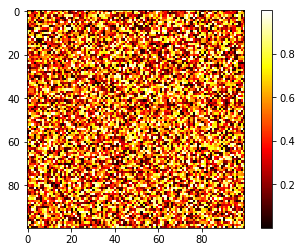

In [103]:
image = np.random.rand(100, 100)
plt.imshow(image, cmap=plt.cm.hot)    
plt.colorbar()    
image

## Индексирование массивов и срезы

В целом так же, как со встроенными последовательностями Python (например, как со списками).


In [104]:
a = np.arange(10)
a

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [105]:
a[0], a[2], a[-1]

(0, 2, 9)

Работает и популярный в Python способ отражения массива:


In [106]:
a[::-1]

array([9, 8, 7, 6, 5, 4, 3, 2, 1, 0])

Для многомерных массивов индексы - это кортежи целых чисел


In [107]:
a = np.diag(np.arange(3))
a

array([[0, 0, 0],
       [0, 1, 0],
       [0, 0, 2]])

In [ ]:
a[1, 1]

In [ ]:
a[2, 1] = 10 # third line, second column
a

In [ ]:
a[1]

**Срезы**

In [108]:
a = np.arange(10)
a

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [113]:
a[2:9:3] # [start:end:step]

array([20, 50, 80])

Последний индекс не включается

In [114]:
a[:4]

array([ 0, 10, 20, 30])

По умолчанию \`start\` -  0,
\`end\` - индекс последнего элемента, \`step\` - 1:


In [115]:
a[1:3]

array([10, 20])

In [116]:
a[::2]

array([ 0, 20, 40, 60, 80])

In [ ]:
a[3:]

Можно совмещать присваивание и срез:


In [117]:
a = np.arange(10)
a[5:] = 10
a

array([ 0,  1,  2,  3,  4, 10, 10, 10, 10, 10])

In [ ]:
b = np.arange(5)
a[5:] = b[::-1]
a

## Пример. Матрица делителей

Отобразить матрицу, в которой вычеркивается **(x, y)**, если **y** делится на **x**.

In [ ]:
from IPython.display import Image
Image(filename='../../img/prime-sieve.png')

* Создадим массив `is_prime`, заполненний значениями True


In [ ]:
is_prime = np.ones((100,), dtype=bool)

* Вычеркнем 0 и 1 как не являющиеся простыми:


In [ ]:
is_prime[:2] = 0

* Для каждого натурального `j` начиная с  2, "вычеркнем" числа, ему кратные:


In [ ]:
N_max = int(np.sqrt(len(is_prime)))
for j in range(2, N_max):
    is_prime[2*j::j] = False
    
is_prime

## Индексирование масками

In [ ]:
np.random.seed(3)
a = np.random.random_integers(0, 20, 15)
a

In [ ]:
(a % 3 == 0)

In [ ]:
mask = (a % 3 == 0)
extract_from_a = a[mask] # or,  a[a%3==0]
extract_from_a           # extract a sub-array with the mask

Индексирование маской может быть очень полезным для присваивания значений части элементов массива:


In [ ]:
a[a % 3 == 0] = -1
a

### Индексирование массивом целых чисел

In [110]:
a = np.arange(0, 100, 10)
a

array([ 0, 10, 20, 30, 40, 50, 60, 70, 80, 90])

In [111]:
a[[2, 3, 2, 4, 2]]  # note: [2, 3, 2, 4, 2] is a Python list

array([20, 30, 20, 40, 20])

In [112]:
a[[9, 7]] = -100
a

array([   0,   10,   20,   30,   40,   50,   60, -100,   80, -100])

In [ ]:
a = np.arange(10)
idx = np.array([[3, 4], [9, 7]])
idx.shape

In [ ]:
a[idx]